<a href="https://colab.research.google.com/github/IreneLedyaeva/CAP-5610/blob/master/HW2/problem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN architecture with hold-out validation, data augmentation, and a dropout layer

### Loading the CIFAR10 data set

In [0]:
from keras.datasets import cifar10

(non_test_images, non_test_labels), (test_images, test_labels) = cifar10.load_data()

### Splitting non-test data into training and validation

In [3]:
num_validation_samples = int(non_test_images.shape[0] * 0.2)

train_images = non_test_images[num_validation_samples:] 
validation_images = non_test_images[:num_validation_samples]

train_labels = non_test_labels[num_validation_samples:] 
validation_labels = non_test_labels[:num_validation_samples]

print('total training images:', train_images.shape[0])
print('total validation images:', validation_images.shape[0])

total training images: 40000
total validation images: 10000


### Encoding the labels

In [0]:
from keras.utils import to_categorical

class_names = ['airplan', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(class_names)

train_labels = to_categorical(train_labels, num_classes)
validation_labels = to_categorical(validation_labels, num_classes)

### Preprocessing the data

In [0]:
train_images = train_images.astype('float32') / 255.0
validation_images = validation_images.astype('float32') / 255.0

### Adding data augmentation
Validation should not be augmented

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training images
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

datagen.fit(train_images)

### Building the model with a dropout layer

In [8]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

### Compiling the model

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### Training the model

In [10]:
history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=30, verbose=1, validation_data=(validation_images, validation_labels), shuffle=True)

1250/1250 [==============================] - 94s 75ms/step - loss: 1.7920 - acc: 0.3390 - val_loss: 1.4514 - val_acc: 0.4863
Epoch 2/30
1250/1250 [==============================] - 93s 74ms/step - loss: 1.4849 - acc: 0.4692 - val_loss: 1.2509 - val_acc: 0.5591
Epoch 3/30
1250/1250 [==============================] - 94s 75ms/step - loss: 1.3625 - acc: 0.5136 - val_loss: 1.1555 - val_acc: 0.5976
Epoch 4/30
1250/1250 [==============================] - 94s 75ms/step - loss: 1.2902 - acc: 0.5438 - val_loss: 1.0482 - val_acc: 0.6363
Epoch 5/30
1250/1250 [==============================] - 93s 75ms/step - loss: 1.2426 - acc: 0.5623 - val_loss: 1.0393 - val_acc: 0.6390
Epoch 6/30
1250/1250 [==============================] - 94s 75ms/step - loss: 1.1997 - acc: 0.5770 - val_loss: 1.0208 - val_acc: 0.6539
Epoch 7/30
1250/1250 [==============================] - 93s 75ms/step - loss: 1.1748 - acc: 0.5891 - val_loss: 1.0409 - val_acc: 0.6425
Epoch 8/30
1250/1250 [==============================] - 93s

The final training accuracy: 0.5634

The final validation accuracy: 0.6401

### Saving the model

In [0]:
model_fname = 'model_augment_dropout.h5' 
model.save(model_fname)

### Downloading the model

In [0]:
from google.colab import files

with open(model_fname, 'r') as f:
  files.download(model_fname)

### Checking overfitting

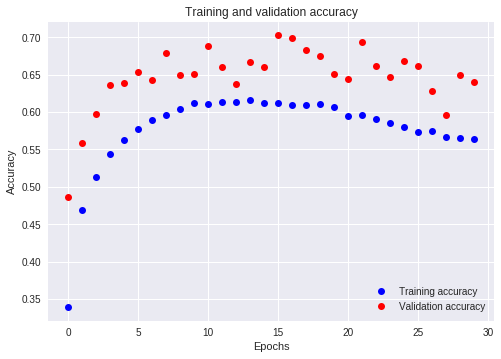

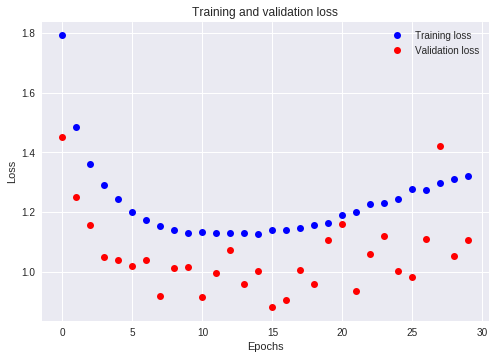

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()